In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.utils.vis_utils import plot_model
from keras.utils.np_utils import to_categorical

from sklearn.model_selection import train_test_split
import seaborn as sns

In [7]:
class Config:
    PATH_TRAIN="./train.csv"
    PATH_TEST="./test.csv"
    PATH_SUBMIT_EXAMPLE="./sample_submission.csv"
    TARGET_COL="label"
    RANDOM_STATE=32
    IMG_DIMETIONS=(28,28,1)

In [10]:
gpus = tf.config.list_physical_devices('GPU')
print("Num GPUs Available: ", len(gpus))

Num GPUs Available:  0


In [9]:
df_train=pd.read_csv(Config.PATH_TRAIN)
df_test=pd.read_csv(Config.PATH_TEST)

In [10]:
X=df_train.drop([Config.TARGET_COL],axis=1)
X=X.values
y=df_train[[Config.TARGET_COL]]

In [33]:
X=X.reshape((X.shape[0],*Config.IMG_DIMETIONS))
y_onehot=np.eye(10)[y].reshape((y.shape[0],10))

In [12]:
X_train, X_val, y_train, y_val = train_test_split(X, y_onehot, test_size=0.3, random_state=Config.RANDOM_STATE)

105/919 [==>...........................] - ETA: 42s - loss: 0.0615 - accuracy: 0.9818

In [13]:
model = keras.Sequential([
    layers.InputLayer(input_shape=(Config.IMG_DIMETIONS)),
    
    layers.Conv2D(64, kernel_size=4, strides=1, activation='relu'),
    layers.Conv2D(64, kernel_size=4, strides=2, activation='relu'),
    
    layers.Dropout(0.5),
    layers.Conv2D(128, kernel_size=4, strides=1, activation='relu'),
    layers.Conv2D(128, kernel_size=4, strides=2, activation='relu'),
    
    layers.Flatten(),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(256, activation='relu'),
    
    layers.Dropout(0.4),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')    
])
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)
history=model.fit(
    X_train,y_train,
    validation_data=(X_val,y_val),
    epochs=10,
    verbose=1
)

Epoch 1/10
919/919 [==============================] - 59s 58ms/step - loss: 0.4104 - accuracy: 0.8698 - val_loss: 0.1233 - val_accuracy: 0.9652
Epoch 2/10
919/919 [==============================] - 40s 43ms/step - loss: 0.1391 - accuracy: 0.9572 - val_loss: 0.0557 - val_accuracy: 0.9828
Epoch 3/10
919/919 [==============================] - 47s 51ms/step - loss: 0.1049 - accuracy: 0.9682 - val_loss: 0.0577 - val_accuracy: 0.9829
Epoch 4/10
919/919 [==============================] - 60s 65ms/step - loss: 0.0916 - accuracy: 0.9724 - val_loss: 0.1553 - val_accuracy: 0.9525
Epoch 5/10
919/919 [==============================] - 65s 70ms/step - loss: 0.0849 - accuracy: 0.9741 - val_loss: 0.0599 - val_accuracy: 0.9860
Epoch 6/10
919/919 [==============================] - 68s 74ms/step - loss: 0.0792 - accuracy: 0.9770 - val_loss: 0.0545 - val_accuracy: 0.9839
Epoch 7/10
919/919 [==============================] - 59s 65ms/step - loss: 0.0985 - accuracy: 0.9708 - val_loss: 0.0778 - val_accuracy:

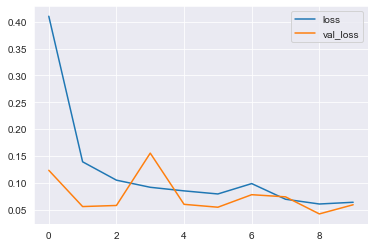

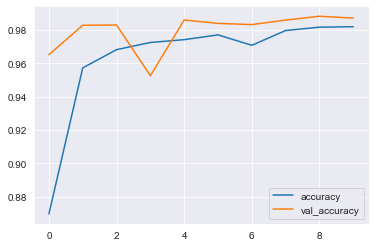

In [14]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();

In [15]:
y_pred_one_hot = model.predict(X_val)
y_pred = np.argmax(y_pred_one_hot, axis=1)

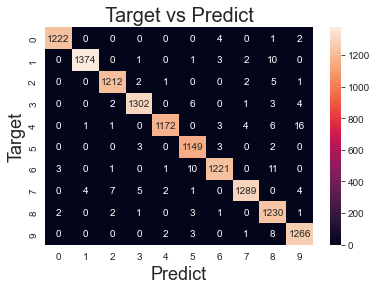

394/394 [==============================] - 4s 9ms/step - loss: 0.0591 - accuracy: 0.9871
Loss = 0.059082139283418655
Accuracy(Test Data)= 0.987063467502594


In [16]:
confusion_matrix = tf.math.confusion_matrix(np.argmax(y_val, axis=1),y_pred)
ax=sns.heatmap(confusion_matrix,annot=True, fmt="d")
ax.set_xlabel("Predict",size=18);
ax.set_ylabel("Target",size=18);
ax.set_title("Target vs Predict",size=20);
plt.show()

evaluations = model.evaluate(x=X_val, y=y_val)
acc = keras.metrics.Accuracy()

print ("Loss = " + str(evaluations[0]))
print ("Accuracy(Test Data)= " + str(evaluations[1]))

# Save Model and Try it

In [ ]:
model.save("cnn-digit-recognizer98acc.h5")

In [ ]:
from PIL import Image

image = Image.open('5.png')
print(image.size)
image=image.resize((28, 28))
print(image.size)
image = image.convert('L')
digit = np.asarray(image)
def f(x): # To high contrast
    if x>=250:
        return 0
    else:
        return x
digit=np.vectorize(f)(digit)
digit=digit.reshape((1,*Config.IMG_DIMETIONS))

In [ ]:
pred_one_hot=model.predict(digit)
y_pred = np.argmax(pred_one_hot, axis=1)
y_pred